In [1]:
# Korean Font Visualization
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,043 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155335 files and d

In [2]:
# My Google Drive Mount하기!
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates

In [4]:
folderpath = '/content/drive/MyDrive/03. Kookmin AI Big Data MBA/AI Portfolio/data'
fname = 'KakaoTalk_20220319.txt'
fpath = folderpath + '/' + fname


f = open(fpath, 'r')
source = f.readlines()
f.close()

data_list = source
print('단톡방 내의 총 데이터 수:', len(data_list))

단톡방 내의 총 데이터 수: 40540


In [6]:
for i in range(5):
    print(data_list[len(data_list) - 1 - i])

[이안/샌프란] [1:54 PM] 한국시간 오늘 밤 10시 세션입니다! @마르코/파리to서울 님과 @Uprise 이효석 매니지스트입니다 님이 참석해주실예정입니다
[이안/샌프란] [1:53 PM] https://www.clubhouse.com/join/%EC%A3%BC%EA%B0%84%EC%8B%A4%EB%A6%AC%EC%BD%98%EB%B0%B8%EB%A6%AC/Zsi2W2xs/mg81L49K?utm_medium=ch_invite&utm_campaign=0v4yggsplxxVYE82oVCiYQ-110693

[KC/스톡홀름] [1:47 PM] 전 개인적으로 oumph가 맛나더라구요 ㅎ https://oumph.net

[KC/스톡홀름] [1:45 PM] 비욘드미트는 동네 슈퍼에도 있습니다 ㅎ 콩고기 브랜드 상품도 많구요

[EL/LA] [1:32 PM] 택사스에 계신분들 피해 없으시길… https://www.nytimes.com/2022/03/18/us/texas-wildfires.html



In [7]:
df = pd.DataFrame(
    data_list,
    columns=['text']
)
df.head()

,text
0,"[구독자만] 주간실리콘밸리: 스타트업,부동산, FIRE with KakaoTalk ..."
1,Date Saved : 2022-03-19 13:56:40\n
2,\n
3,"--------------- Saturday, January 1, 2022 ----..."
4,Josh/Seoul joined this chatroom.You may tempor...


In [8]:
df = df.drop(
    [0, 1, 2]
)
df = df.reset_index(drop=True)
df.head(3)

,text
0,"--------------- Saturday, January 1, 2022 ----..."
1,Josh/Seoul joined this chatroom.You may tempor...
2,Identification and restriction of illegally fi...


## text 타입별 구분

* **날짜 데이터**
    * --------------- Saturday, January 1, 2022
* **단톡방 입장**
    * NAME joined this chatroom.You may
* **단톡방 퇴장**
    * NAME left
* **필요 없는 메시지**
    * Identification and restriction of illegally fi...
    * Videos · compressed file that are sent through...
    * NAME has been assigned as the admin.
    * \n (의미 없는 whitespace only)
* **Chat 데이터**
    * [NAME] [H:MM XM] 안녕하세요. 한국에 있는...
    * 여튼, 감사합니다
* **사진 데이터**
    * 1 photo
    * n photos

In [ ]:
# 필요 없는 메시지 삭제

for idx in reversed(range(len(df))):
    text = df.iloc[idx].text
    if text.startswith('Identification and restriction of illegally fi') == True:
        df = df.drop([idx])
    elif text.startswith('Videos · compressed file that are sent through') == True:
        df = df.drop([idx])
    elif text.endswith('has been assigned as the admin.\n') == True:
        df = df.drop([idx])
    elif text == '\n':
        df = df.drop([idx])

df = df.reset_index(drop=True)

In [10]:
df.tail()

,text
36776,[EL/LA] [1:32 PM] 택사스에 계신분들 피해 없으시길… https://w...
36777,[KC/스톡홀름] [1:45 PM] 비욘드미트는 동네 슈퍼에도 있습니다 ㅎ 콩고기 ...
36778,[KC/스톡홀름] [1:47 PM] 전 개인적으로 oumph가 맛나더라구요 ㅎ ht...
36779,[이안/샌프란] [1:53 PM] https://www.clubhouse.com/j...
36780,[이안/샌프란] [1:54 PM] 한국시간 오늘 밤 10시 세션입니다! @마르코/파...


In [11]:
# 날짜 Column 생성하기
    # 날짜 데이터 Row가 발견될 때, 그 다음 날짜 데이터 Row를 만나기 전까지는 모든 데이터들이 해당 날짜 데이터를 부여 받는다.
    # 날짜 Column 입력 완료 후, 기존의 날짜 데이터 Row는 모조리 삭제한다.

df['date'] = 'N/A'

for idx in range(len(df)):
    text = df.iloc[idx].text
    if text.startswith('---------------') == True:
        date = text
        date = date.replace('-', '')
        date = date.strip()
    else:
        df.loc[idx, 'date'] = date

for idx in reversed(range(len(df))):
    text = df.iloc[idx].text
    if text.startswith('---------------') == True:
        df = df.drop([idx])
df = df.reset_index(drop=True)

df.tail()

,text,date
36703,[EL/LA] [1:32 PM] 택사스에 계신분들 피해 없으시길… https://w...,"Saturday, March 19, 2022"
36704,[KC/스톡홀름] [1:45 PM] 비욘드미트는 동네 슈퍼에도 있습니다 ㅎ 콩고기 ...,"Saturday, March 19, 2022"
36705,[KC/스톡홀름] [1:47 PM] 전 개인적으로 oumph가 맛나더라구요 ㅎ ht...,"Saturday, March 19, 2022"
36706,[이안/샌프란] [1:53 PM] https://www.clubhouse.com/j...,"Saturday, March 19, 2022"
36707,[이안/샌프란] [1:54 PM] 한국시간 오늘 밤 10시 세션입니다! @마르코/파...,"Saturday, March 19, 2022"


In [12]:
# 데이터 타입 Column 생성하기
    # 단톡방 입장: joined
    # 단톡방 퇴장: left
    # Chat: chat
    # Photos: photo

df['type'] = 'N/A'


for idx in range(len(df)):
    text = df.loc[idx, 'text']

    if text.find('joined this chatroom.') > 0:
        df.loc[idx, 'type'] = 'joined'
    elif text.endswith('left.\n') == True:
        df.loc[idx, 'type'] = 'left'
    elif text.endswith('photos\n') == True or text.endswith('photo\n') == True:
        df.loc[idx, 'type'] = 'photo'
    else:
        df.loc[idx, 'type'] = 'chat'

df.tail()

,text,date,type
36703,[EL/LA] [1:32 PM] 택사스에 계신분들 피해 없으시길… https://w...,"Saturday, March 19, 2022",chat
36704,[KC/스톡홀름] [1:45 PM] 비욘드미트는 동네 슈퍼에도 있습니다 ㅎ 콩고기 ...,"Saturday, March 19, 2022",chat
36705,[KC/스톡홀름] [1:47 PM] 전 개인적으로 oumph가 맛나더라구요 ㅎ ht...,"Saturday, March 19, 2022",chat
36706,[이안/샌프란] [1:53 PM] https://www.clubhouse.com/j...,"Saturday, March 19, 2022",chat
36707,[이안/샌프란] [1:54 PM] 한국시간 오늘 밤 10시 세션입니다! @마르코/파...,"Saturday, March 19, 2022",chat


In [13]:
# chat 타입 중에서 [NAME] [H:MM XM] 형식이 아닌 Row를 그 바로 위에 concat해주기
    # 채팅 text 입력시, 사람들이 Enter를 쳐서 whitespace가 발생한 경우에 해당함

for idx in reversed(range(len(df))):

    if df.loc[idx, 'type'] == 'chat':

        text = df.loc[idx, 'text']

        if text.startswith('[') == False or text.find('M]') <= 0:

            text_above = df.loc[idx - 1, 'text']
            text = text_above + ' ' + text
            df.loc[idx - 1, 'text'] = text
            df = df.drop([idx])

df = df.reset_index(drop=True)
df.tail()

,text,date,type
30343,[EL/LA] [1:32 PM] 택사스에 계신분들 피해 없으시길… https://w...,"Saturday, March 19, 2022",chat
30344,[KC/스톡홀름] [1:45 PM] 비욘드미트는 동네 슈퍼에도 있습니다 ㅎ 콩고기 ...,"Saturday, March 19, 2022",chat
30345,[KC/스톡홀름] [1:47 PM] 전 개인적으로 oumph가 맛나더라구요 ㅎ ht...,"Saturday, March 19, 2022",chat
30346,[이안/샌프란] [1:53 PM] https://www.clubhouse.com/j...,"Saturday, March 19, 2022",chat
30347,[이안/샌프란] [1:54 PM] 한국시간 오늘 밤 10시 세션입니다! @마르코/파...,"Saturday, March 19, 2022",chat


In [14]:
# uesr Column 생성하기
    # 단톡방 입장: joined
    # 단톡방 퇴장: left
    # Chat: chat

df['user'] = 'N/A'

for idx in range(len(df)):
    
    text = df.loc[idx, 'text']

    if df.loc[idx, 'type'] == 'joined':

        joined_iloc = text.find('joined this chatroom.')
        user = text[: joined_iloc - 1]
        df.loc[idx, 'user'] = user

    elif df.loc[idx, 'type'] == 'left':

        left_iloc = text.find('left.\n')
        user = text[: left_iloc - 1]
        df.loc[idx, 'user'] = user

    else:

        left_iloc = text.find('[')
        right_iloc = text.find(']')
        user = text[left_iloc + 1 : right_iloc]
        df.loc[idx, 'user'] = user

df.tail()

,text,date,type,user
30343,[EL/LA] [1:32 PM] 택사스에 계신분들 피해 없으시길… https://w...,"Saturday, March 19, 2022",chat,EL/LA
30344,[KC/스톡홀름] [1:45 PM] 비욘드미트는 동네 슈퍼에도 있습니다 ㅎ 콩고기 ...,"Saturday, March 19, 2022",chat,KC/스톡홀름
30345,[KC/스톡홀름] [1:47 PM] 전 개인적으로 oumph가 맛나더라구요 ㅎ ht...,"Saturday, March 19, 2022",chat,KC/스톡홀름
30346,[이안/샌프란] [1:53 PM] https://www.clubhouse.com/j...,"Saturday, March 19, 2022",chat,이안/샌프란
30347,[이안/샌프란] [1:54 PM] 한국시간 오늘 밤 10시 세션입니다! @마르코/파...,"Saturday, March 19, 2022",chat,이안/샌프란


In [15]:
# text에서 필요 없는 정보 삭제하기
    # joined 타입: N/A로 바꾸기
    # left 타입: N/A로 바꾸기
    # chat 타입: [NAME] [TIME] 중 [NAME]만 삭제하기
    # photo 타입: [NAME] [TIME] 중 [NAME]만 삭제하기

for idx in range(len(df)):
    
    text = df.loc[idx, 'text']

    if df.loc[idx, 'type'] == 'joined':
        df.loc[idx, 'text'] = 'N/A'
    elif df.loc[idx, 'type'] == 'left':
        df.loc[idx, 'text'] = 'N/A'
    elif df.loc[idx, 'type'] == 'chat':
        right_iloc = text.find(']')
        text = text[right_iloc + 2 :]
        df.loc[idx, 'text'] = text
    elif df.loc[idx, 'type'] == 'photo':
        right_iloc = text.find(']')
        text = text[right_iloc + 2 :]
        df.loc[idx, 'text'] = text

df.tail()

,text,date,type,user
30343,[1:32 PM] 택사스에 계신분들 피해 없으시길… https://www.nytim...,"Saturday, March 19, 2022",chat,EL/LA
30344,[1:45 PM] 비욘드미트는 동네 슈퍼에도 있습니다 ㅎ 콩고기 브랜드 상품도 많구요\n,"Saturday, March 19, 2022",chat,KC/스톡홀름
30345,[1:47 PM] 전 개인적으로 oumph가 맛나더라구요 ㅎ https://oump...,"Saturday, March 19, 2022",chat,KC/스톡홀름
30346,[1:53 PM] https://www.clubhouse.com/join/%EC%A...,"Saturday, March 19, 2022",chat,이안/샌프란
30347,[1:54 PM] 한국시간 오늘 밤 10시 세션입니다! @마르코/파리to서울 님과 ...,"Saturday, March 19, 2022",chat,이안/샌프란


In [16]:
# time Column 생성하기
    # 단톡방 입장: joined (time 획득 불가능)
    # 단톡방 퇴장: left (time 획득 불가능)
    # Chat: chat (time 획득 가능)
    # Photo: photo (time 획득 가능)
        # photo의 경우, time 획득한 후에는 text 데이터는 'N/A'로 표시해준다.

df['time'] = 'N/A'

for idx in range(len(df)):

    text = df.loc[idx, 'text']

    if df.loc[idx, 'type'] == 'chat':

        left_iloc = text.find('[')
        right_iloc = text.find(']')
        time = text[left_iloc + 1 : right_iloc]
        df.loc[idx, 'time'] = time

    elif df.loc[idx, 'type'] == 'photo':

        left_iloc = text.find('[')
        right_iloc = text.find(']')
        time = text[left_iloc + 1 : right_iloc]
        df.loc[idx, 'time'] = time
        df.loc[idx, 'text'] = 'N/A'

df.tail()

,text,date,type,user,time
30343,[1:32 PM] 택사스에 계신분들 피해 없으시길… https://www.nytim...,"Saturday, March 19, 2022",chat,EL/LA,1:32 PM
30344,[1:45 PM] 비욘드미트는 동네 슈퍼에도 있습니다 ㅎ 콩고기 브랜드 상품도 많구요\n,"Saturday, March 19, 2022",chat,KC/스톡홀름,1:45 PM
30345,[1:47 PM] 전 개인적으로 oumph가 맛나더라구요 ㅎ https://oump...,"Saturday, March 19, 2022",chat,KC/스톡홀름,1:47 PM
30346,[1:53 PM] https://www.clubhouse.com/join/%EC%A...,"Saturday, March 19, 2022",chat,이안/샌프란,1:53 PM
30347,[1:54 PM] 한국시간 오늘 밤 10시 세션입니다! @마르코/파리to서울 님과 ...,"Saturday, March 19, 2022",chat,이안/샌프란,1:54 PM


In [17]:
# text 중 chat 타입인 경우 [H:MM XM] 삭제해주기

for idx in range(len(df)):

    if df.loc[idx, 'type'] == 'chat':

        text = df.loc[idx, 'text']
        right_iloc = text.find(']')
        text = text[right_iloc + 2 :]
        df.loc[idx, 'text'] = text

df.tail()

,text,date,type,user,time
30343,택사스에 계신분들 피해 없으시길… https://www.nytimes.com/202...,"Saturday, March 19, 2022",chat,EL/LA,1:32 PM
30344,비욘드미트는 동네 슈퍼에도 있습니다 ㅎ 콩고기 브랜드 상품도 많구요\n,"Saturday, March 19, 2022",chat,KC/스톡홀름,1:45 PM
30345,전 개인적으로 oumph가 맛나더라구요 ㅎ https://oumph.net\n,"Saturday, March 19, 2022",chat,KC/스톡홀름,1:47 PM
30346,https://www.clubhouse.com/join/%EC%A3%BC%EA%B0...,"Saturday, March 19, 2022",chat,이안/샌프란,1:53 PM
30347,한국시간 오늘 밤 10시 세션입니다! @마르코/파리to서울 님과 @Uprise 이효...,"Saturday, March 19, 2022",chat,이안/샌프란,1:54 PM


In [18]:
# text의 '\n' 를 ''로 바꿔주기

for idx in range(len(df)):
    
    if df.loc[idx, 'type'] == 'chat':

        text = df.loc[idx, 'text']

        if text.find('\n') > 0:
            text = text.replace('\n', '')
            df.loc[idx, 'text'] = text

df.tail()

,text,date,type,user,time
30343,택사스에 계신분들 피해 없으시길… https://www.nytimes.com/202...,"Saturday, March 19, 2022",chat,EL/LA,1:32 PM
30344,비욘드미트는 동네 슈퍼에도 있습니다 ㅎ 콩고기 브랜드 상품도 많구요,"Saturday, March 19, 2022",chat,KC/스톡홀름,1:45 PM
30345,전 개인적으로 oumph가 맛나더라구요 ㅎ https://oumph.net,"Saturday, March 19, 2022",chat,KC/스톡홀름,1:47 PM
30346,https://www.clubhouse.com/join/%EC%A3%BC%EA%B0...,"Saturday, March 19, 2022",chat,이안/샌프란,1:53 PM
30347,한국시간 오늘 밤 10시 세션입니다! @마르코/파리to서울 님과 @Uprise 이효...,"Saturday, March 19, 2022",chat,이안/샌프란,1:54 PM


In [19]:
# date Column을 date format으로 변환하기

df['date'] = pd.to_datetime(
    df['date']
).dt.date

df.tail()

,text,date,type,user,time
30343,택사스에 계신분들 피해 없으시길… https://www.nytimes.com/202...,2022-03-19,chat,EL/LA,1:32 PM
30344,비욘드미트는 동네 슈퍼에도 있습니다 ㅎ 콩고기 브랜드 상품도 많구요,2022-03-19,chat,KC/스톡홀름,1:45 PM
30345,전 개인적으로 oumph가 맛나더라구요 ㅎ https://oumph.net,2022-03-19,chat,KC/스톡홀름,1:47 PM
30346,https://www.clubhouse.com/join/%EC%A3%BC%EA%B0...,2022-03-19,chat,이안/샌프란,1:53 PM
30347,한국시간 오늘 밤 10시 세션입니다! @마르코/파리to서울 님과 @Uprise 이효...,2022-03-19,chat,이안/샌프란,1:54 PM


In [20]:
# time Column 중 N/A 값들을 모두 NaN 타입으로 변환해주기

for idx in range(len(df)):

    time = df.loc[idx, 'time']

    if time == 'N/A':
        time = np.nan
        df.loc[idx, 'time'] = np.nan

df.tail()

,text,date,type,user,time
30343,택사스에 계신분들 피해 없으시길… https://www.nytimes.com/202...,2022-03-19,chat,EL/LA,1:32 PM
30344,비욘드미트는 동네 슈퍼에도 있습니다 ㅎ 콩고기 브랜드 상품도 많구요,2022-03-19,chat,KC/스톡홀름,1:45 PM
30345,전 개인적으로 oumph가 맛나더라구요 ㅎ https://oumph.net,2022-03-19,chat,KC/스톡홀름,1:47 PM
30346,https://www.clubhouse.com/join/%EC%A3%BC%EA%B0...,2022-03-19,chat,이안/샌프란,1:53 PM
30347,한국시간 오늘 밤 10시 세션입니다! @마르코/파리to서울 님과 @Uprise 이효...,2022-03-19,chat,이안/샌프란,1:54 PM


In [21]:
# date Column과 time Column을 concat하여 time Column에 입력해주기
    # time이 NaN인 경우: 그대로 놓아둔다.
    # time이 NaN이 아닌 경우: date와 time을 concat한다.

for idx in range(len(df)):

    text = df.loc[idx, 'time']

    if pd.isnull(text) == True:
        continue
    else:
        date = df.loc[idx, 'date']
        time = df.loc[idx, 'time']
        datetime = str(date) + ' ' + str(time)
        text = datetime
        df.loc[idx, 'time'] = text

df.tail()

,text,date,type,user,time
30343,택사스에 계신분들 피해 없으시길… https://www.nytimes.com/202...,2022-03-19,chat,EL/LA,2022-03-19 1:32 PM
30344,비욘드미트는 동네 슈퍼에도 있습니다 ㅎ 콩고기 브랜드 상품도 많구요,2022-03-19,chat,KC/스톡홀름,2022-03-19 1:45 PM
30345,전 개인적으로 oumph가 맛나더라구요 ㅎ https://oumph.net,2022-03-19,chat,KC/스톡홀름,2022-03-19 1:47 PM
30346,https://www.clubhouse.com/join/%EC%A3%BC%EA%B0...,2022-03-19,chat,이안/샌프란,2022-03-19 1:53 PM
30347,한국시간 오늘 밤 10시 세션입니다! @마르코/파리to서울 님과 @Uprise 이효...,2022-03-19,chat,이안/샌프란,2022-03-19 1:54 PM


In [22]:
# time Column을 datetime format으로 변환하기

df['time'] = pd.to_datetime(
    df['time']
)

df.tail()

,text,date,type,user,time
30343,택사스에 계신분들 피해 없으시길… https://www.nytimes.com/202...,2022-03-19,chat,EL/LA,2022-03-19 13:32:00
30344,비욘드미트는 동네 슈퍼에도 있습니다 ㅎ 콩고기 브랜드 상품도 많구요,2022-03-19,chat,KC/스톡홀름,2022-03-19 13:45:00
30345,전 개인적으로 oumph가 맛나더라구요 ㅎ https://oumph.net,2022-03-19,chat,KC/스톡홀름,2022-03-19 13:47:00
30346,https://www.clubhouse.com/join/%EC%A3%BC%EA%B0...,2022-03-19,chat,이안/샌프란,2022-03-19 13:53:00
30347,한국시간 오늘 밤 10시 세션입니다! @마르코/파리to서울 님과 @Uprise 이효...,2022-03-19,chat,이안/샌프란,2022-03-19 13:54:00


In [23]:
# type 별로 df를 나누기

df_chat = df[df['type'] == 'chat']
df_chat = df_chat.reset_index(drop=True)

df_joined = df[df['type'] == 'joined']
df_joined = df_joined.reset_index(drop=True)

df_left = df[df['type'] == 'left']
df_left = df_left.reset_index(drop=True)

df_photo = df[df['type'] == 'photo']
df_photo = df_photo.reset_index(drop=True)

print('chat:', df_chat.shape)
print('joined:', df_joined.shape)
print('left:', df_left.shape)
print('photo:', df_photo.shape)

chat: (29116, 5)
joined: (866, 5)
left: (282, 5)
photo: (84, 5)


In [24]:
# Joined의 일자별/요일별 Flow

df_joinedgroupbydate = df_joined['user'].groupby(df_joined['date']).count()
df_joinedgroupbydate = pd.DataFrame(df_joinedgroupbydate)
df_joinedgroupbydate.index = pd.to_datetime(df_joinedgroupbydate.index)

df_joinedgroupbydate['day of week'] = list(df_joinedgroupbydate.index.dayofweek)
df_joinedgroupbydate.head()

,user,day of week
date,,
2022-01-01,46,5
2022-01-02,42,6
2022-01-04,13,1
2022-01-05,16,2
2022-01-06,10,3


In [25]:
weekly_df = df_joinedgroupbydate.resample('W').mean()['user']
monthly_df = df_joinedgroupbydate.resample('M').mean()['user']
dow_df = df_joinedgroupbydate.groupby(df_joinedgroupbydate['day of week']).mean()

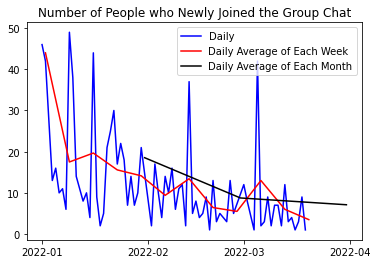

''

In [26]:
# 시각화

plt.plot(df_joinedgroupbydate['user'], color='blue', label='Daily')
plt.plot(weekly_df, color='red', label='Daily Average of Each Week')
plt.plot(monthly_df, color='black', label='Daily Average of Each Month')

ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1))

plt.title('Number of People who Newly Joined the Group Chat')
plt.legend(loc='upper right')

plt.show()
;

No handles with labels found to put in legend.


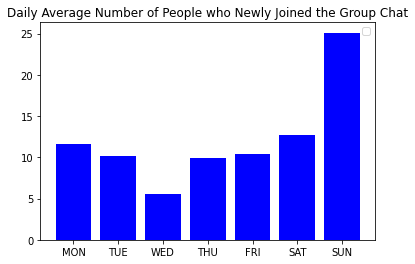

''

In [27]:
# 요일별 시각화

dow_list = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']

plt.bar(dow_list, dow_df['user'], color='blue')

plt.title('Daily Average Number of People who Newly Joined the Group Chat')
plt.legend(loc='upper right')

plt.show()
;

In [28]:
# Left의 일자별/요일별 Flow

df_leftgroupbydate = df_left['user'].groupby(df_left['date']).count()
df_leftgroupbydate.index = pd.to_datetime(df_leftgroupbydate.index)
df_leftgroupbydate = pd.DataFrame(df_leftgroupbydate)
df_leftgroupbydate.index = pd.to_datetime(df_leftgroupbydate.index)

df_leftgroupbydate['day of week'] = list(df_leftgroupbydate.index.dayofweek)
df_leftgroupbydate.head()

,user,day of week
date,,
2022-01-01,1,5
2022-01-02,1,6
2022-01-04,3,1
2022-01-05,2,2
2022-01-06,2,3


In [29]:
weekly_df = df_leftgroupbydate.resample('W').mean()['user']
monthly_df = df_leftgroupbydate.resample('M').mean()['user']
dow_df = df_leftgroupbydate.groupby(df_leftgroupbydate['day of week']).mean()

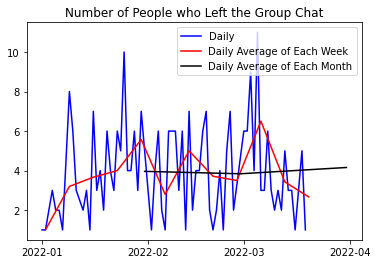

''

In [30]:
# 시각화

plt.plot(df_leftgroupbydate['user'], color='blue', label='Daily')
plt.plot(weekly_df, color='red', label='Daily Average of Each Week')
plt.plot(monthly_df, color='black', label='Daily Average of Each Month')

ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1))

plt.title('Number of People who Left the Group Chat')
plt.legend(loc='upper right')

plt.show()
;

No handles with labels found to put in legend.


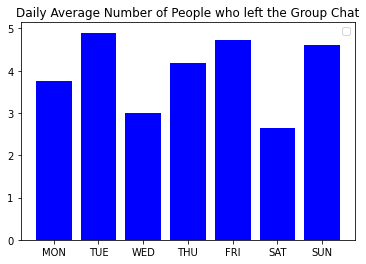

''

In [31]:
# 요일별 시각화

dow_list = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']

plt.bar(dow_list, dow_df['user'], color='blue')

plt.title('Daily Average Number of People who left the Group Chat')
plt.legend(loc='upper right')

plt.show()
;